In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
import nltk
nltk.download('punkt_tab')

paragraph = """
Technology is rapidly transforming our world. From artificial intelligence to blockchain,
new advancements are being made daily. Smartphones allow us to stay connected at all times.
Cloud computing has revolutionized how we store and access data. Social media impacts communication across the globe.
"""


text_clean = re.sub(r'[^\w\s]', '', paragraph.lower())


words = word_tokenize(text_clean)
sentences = sent_tokenize(paragraph)


split_words = text_clean.split()
comparison = {"split": split_words, "word_tokenize": words}


stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w not in stop_words]


word_freq = Counter(filtered_words)
print("Word Frequency:", word_freq)


Word Frequency: Counter({'technology': 1, 'rapidly': 1, 'transforming': 1, 'world': 1, 'artificial': 1, 'intelligence': 1, 'blockchain': 1, 'new': 1, 'advancements': 1, 'made': 1, 'daily': 1, 'smartphones': 1, 'allow': 1, 'us': 1, 'stay': 1, 'connected': 1, 'times': 1, 'cloud': 1, 'computing': 1, 'revolutionized': 1, 'store': 1, 'access': 1, 'data': 1, 'social': 1, 'media': 1, 'impacts': 1, 'communication': 1, 'across': 1, 'globe': 1})


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

alpha_words = re.findall(r'\b[a-zA-Z]+\b', text_clean)

filtered_alpha = [w for w in alpha_words if w not in stop_words]


stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered_alpha]


lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered_alpha]


for original, stem, lemma in zip(filtered_alpha, stemmed, lemmatized):
    print(f"Original: {original} | Stemmed: {stem} | Lemmatized: {lemma}")


Original: technology | Stemmed: technolog | Lemmatized: technology
Original: rapidly | Stemmed: rapidli | Lemmatized: rapidly
Original: transforming | Stemmed: transform | Lemmatized: transforming
Original: world | Stemmed: world | Lemmatized: world
Original: artificial | Stemmed: artifici | Lemmatized: artificial
Original: intelligence | Stemmed: intellig | Lemmatized: intelligence
Original: blockchain | Stemmed: blockchain | Lemmatized: blockchain
Original: new | Stemmed: new | Lemmatized: new
Original: advancements | Stemmed: advanc | Lemmatized: advancement
Original: made | Stemmed: made | Lemmatized: made
Original: daily | Stemmed: daili | Lemmatized: daily
Original: smartphones | Stemmed: smartphon | Lemmatized: smartphones
Original: allow | Stemmed: allow | Lemmatized: allow
Original: us | Stemmed: us | Lemmatized: u
Original: stay | Stemmed: stay | Lemmatized: stay
Original: connected | Stemmed: connect | Lemmatized: connected
Original: times | Stemmed: time | Lemmatized: time


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "The iPhone 15 has a better camera and battery life.",
    "The movie was outstanding and received great reviews.",
    "I love this product! It's reliable and affordable."
]


cv = CountVectorizer()
bow = cv.fit_transform(texts).toarray()


tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)


features = tfidf.get_feature_names_out()
for i, vector in enumerate(tfidf_matrix.toarray()):
    top3 = np.argsort(vector)[-3:][::-1]
    keywords = [features[j] for j in top3]
    print(f"Text {i+1} Top Keywords:", keywords)


Text 1 Top Keywords: ['battery', '15', 'camera']
Text 2 Top Keywords: ['was', 'reviews', 'movie']
Text 3 Top Keywords: ['this', 'reliable', 'it']


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

text1 = "Artificial Intelligence is transforming how we work, communicate, and innovate."
text2 = "Blockchain allows secure, transparent transactions without needing central control."


def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    return set([t for t in tokens if t not in stop_words])

set1 = preprocess(text1)
set2 = preprocess(text2)


jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", jaccard_sim)


tfidf = TfidfVectorizer()
vecs = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])[0][0]
print("Cosine Similarity:", cos_sim)


Jaccard Similarity: 0.0
Cosine Similarity: 0.0


Classified Reviews:

Positive:
- The phone has a great camera and amazing battery life.
- Absolutely love the features and performance!
- It's an average product. Nothing special.

Negative:

Neutral:
- Worst service I have ever experienced.
- The packaging was okay, not too bad.


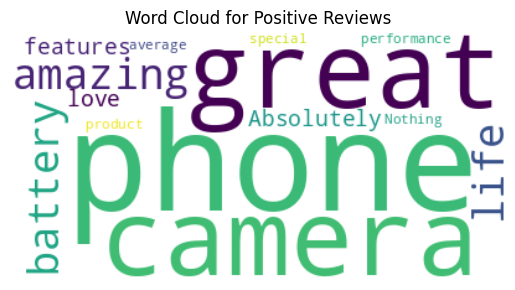

In [19]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt


reviews = [
    "The phone has a great camera and amazing battery life.",
    "Worst service I have ever experienced.",
    "The packaging was okay, not too bad.",
    "Absolutely love the features and performance!",
    "It's an average product. Nothing special."
]


classified_reviews = {"Positive": [], "Negative": [], "Neutral": []}

for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        classified_reviews["Positive"].append(review)
    elif polarity < -0.1:
        classified_reviews["Negative"].append(review)
    else:
        classified_reviews["Neutral"].append(review)


print("Classified Reviews:")
for sentiment, revs in classified_reviews.items():
    print(f"\n{sentiment}:")
    for r in revs:
        print(f"- {r}")


positive_text = " ".join(classified_reviews["Positive"])
wordcloud = WordCloud(background_color='white').generate(positive_text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()


In [23]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



paragraph = """Artificial Intelligence is changing the world. It powers smart assistants, autonomous vehicles, and advanced robotics.
AI enhances decision making and makes machines more intelligent."""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
sequences = []
total_words = len(tokenizer.word_index) + 1


tokens = tokenizer.texts_to_sequences([paragraph])[0]
for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1]
    sequences.append(n_gram_sequence)


sequences = pad_sequences(sequences, padding='pre')
X, y = sequences[:,:-1], sequences[:,-1]


model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=X.shape[1]))
model.add(LSTM(50))
model.add(Dense(total_words, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=0)


seed_text = "AI"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=X.shape[1], padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word = ""

    for word, index in tokenizer.word_index.items():
        if index == np.argmax(predicted):
            predicted_word = word
            break
    seed_text += " " + predicted_word

print("Generated Text:", seed_text)


Generated Text: AI intelligence intelligence is
